In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
print("Loading data...")

Loading data...


In [29]:
df= pd.read_csv("D:\Churn_Modelling.csv", encoding='utf-8')

In [30]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df.shape

(10000, 14)

In [32]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
numeric_features= [feature for feature in df.columns if df[feature].dtype!= 'object'
                   and feature not in ['RowNumber', 'CustomerId']]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object'
                        and feature not in ['RowNumber', 'CustomerId', 'Surname']]

In [36]:
print(df.head())
# hascrcrard is categorical feature
df['HasCrCard'] = df['HasCrCard'].astype('object')
df["IsActiveMember"] = df["IsActiveMember"].astype('object')

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [37]:
numeric_features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [38]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: label='my subplot', title={'center': 'No of people who exited refers to 1  having credit card refers blue color'}, xlabel='Exited', ylabel='count'>

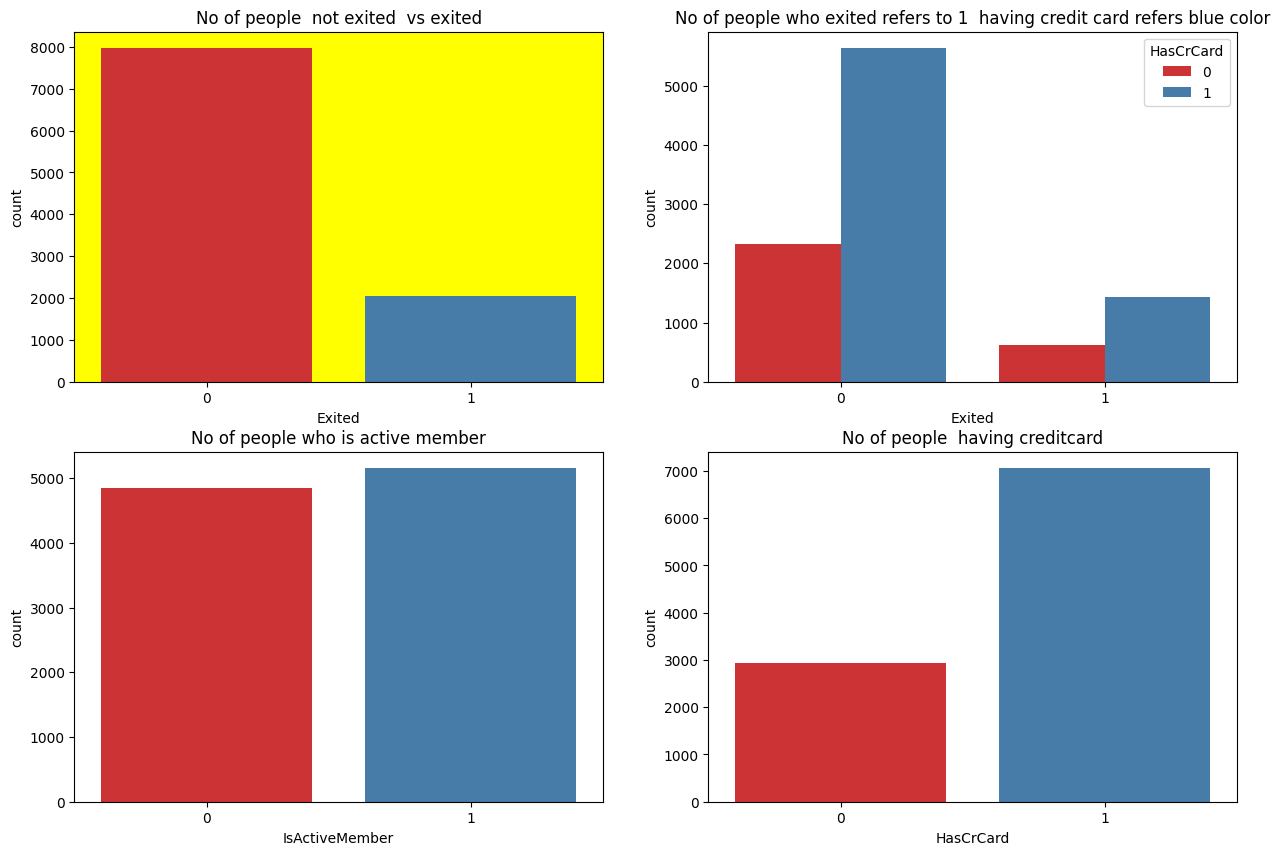

In [39]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1, title="No of people  not exited  vs exited", facecolor="yellow",label="my subplot")
sns.countplot(x='Exited', data=df, palette='Set1')
plt.subplot(2,2,4, title="No of people  having creditcard", facecolor="white",label="my subplot")
sns.countplot(x='HasCrCard',  data=df, palette='Set1')
plt.subplot(2,2,3, title="No of people who is active member", facecolor="white",label="my subplot")
sns.countplot(x='IsActiveMember', data=df, palette='Set1')
plt.subplot(2,2,2, title="No of people who exited refers to 1  having credit card refers blue color", facecolor="white",label="my subplot")
sns.countplot(x='Exited', hue='HasCrCard', data=df, palette='Set1')


([<matplotlib.patches.Wedge at 0x107c7fd08c0>,
 [Text(-0.3116068602303155, -1.0549413086316246, 'No'),
  Text(0.31160701952201786, 1.0549412615802858, 'Yes')],
 [Text(-0.16996737830744477, -0.5754225319808861, '63.1%'),
  Text(0.1699674651938279, 0.5754225063165195, '36.9%')])

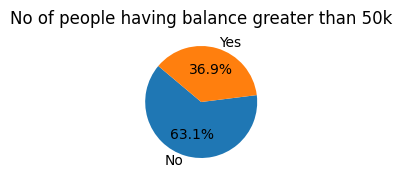

In [40]:
df["bal_gt_50k"]= df["Balance"] > 50000
plt.figure(figsize=(5,4))
plt.subplot(2,2,1, title="No of people having balance greater than 50k", facecolor="yellow",label="my subplot")
plt.pie(df["bal_gt_50k"].value_counts(), labels=["No", "Yes"], autopct='%1.1f%%', startangle=140)

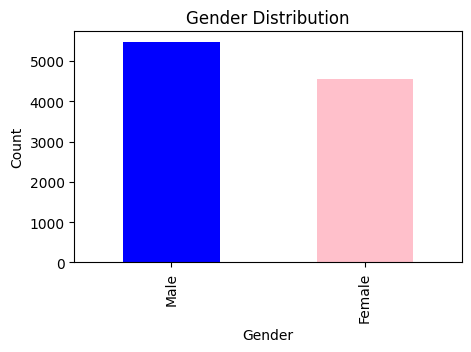

In [41]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'pink'], figsize=(5, 3))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [42]:
df["salary_range"] = pd.cut(df["EstimatedSalary"],
                           bins=[0, 50000, 100000, 150000, 200000, np.inf],
                           labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+'])

In [43]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_gt_50k,salary_range
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,100k-150k
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,True,100k-150k
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,100k-150k
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,50k-100k
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,True,50k-100k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,False,50k-100k
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,True,100k-150k
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,False,0-50k
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,True,50k-100k


Text(0.5, 1.0, 'Salary Range Distribution')

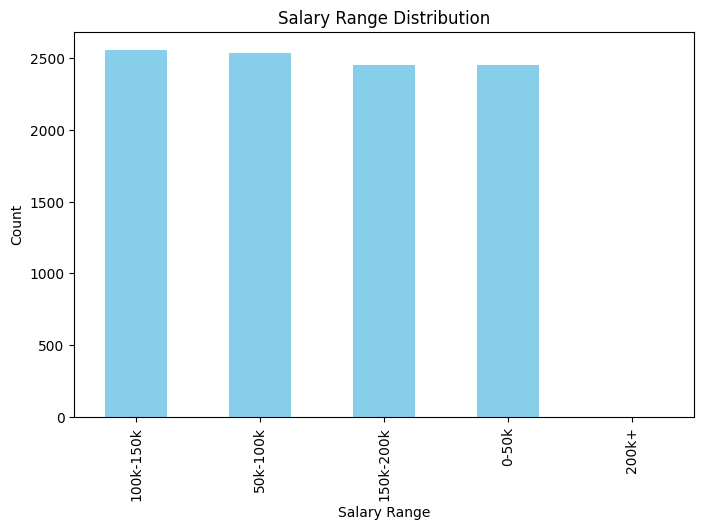

In [44]:
df["salary_range"].value_counts().plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.title('Salary Range Distribution')

In [45]:
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_gt_50k,salary_range
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,100k-150k
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,True,100k-150k
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,100k-150k
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,50k-100k
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,True,50k-100k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,False,50k-100k
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,True,100k-150k
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,False,0-50k
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,True,50k-100k


Text(0.5, 1.0, 'Number of Products Distribution')

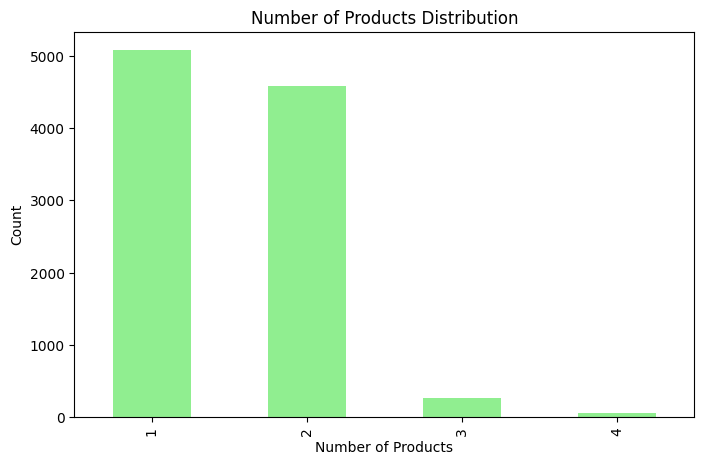

In [46]:
df["NumOfProducts"].value_counts().plot(kind='bar', color='lightgreen', figsize=(8, 5))
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Number of Products Distribution')

In [47]:
bins = [0, 600, 650, 700, float('inf')]
labels = ['poor', 'avg', 'good', 'excellent']

df['credit_category'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=True)

## to  create range of feature we use pd.cut(df[colomn name],  bins[0,100,150,200, np.inf], labels=[good ,bad, poor,worst])

In [48]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_gt_50k,salary_range,credit_category
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,100k-150k,avg
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,True,100k-150k,avg
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,100k-150k,poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,50k-100k,good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,True,50k-100k,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,False,50k-100k,excellent
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,True,100k-150k,poor
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,False,0-50k,excellent
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,True,50k-100k,excellent


Text(0.5, 1.0, 'Credit Score Category Distribution')

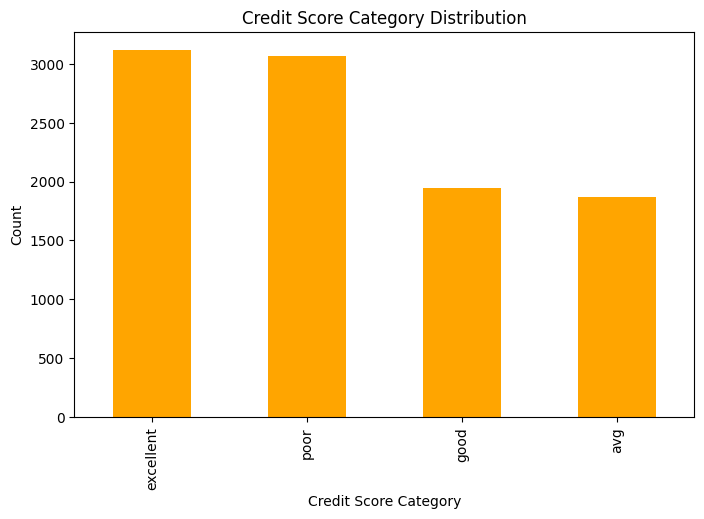

In [49]:
df['credit_category'].value_counts().plot(kind='bar', color='orange', figsize=(8, 5))
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.title('Credit Score Category Distribution')                 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  object  
 5   Gender           10000 non-null  object  
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  object  
 11  IsActiveMember   10000 non-null  object  
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
 14  bal_gt_50k       10000 non-null  bool    
 15  salary_range     10000 non-null  category
 16  credit_category  10000 non-null  category

In [51]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_gt_50k,salary_range,credit_category
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,100k-150k,avg
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,True,100k-150k,avg
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,100k-150k,poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,50k-100k,good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,True,50k-100k,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,False,50k-100k,excellent
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,True,100k-150k,poor
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,False,0-50k,excellent
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,True,50k-100k,excellent
